# Task 4: Center Trajectories

In [1]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, List

In [13]:
df = pd.read_csv('geolife-cars-upd8.csv')
print(df.describe())
print(df.head())
print(len(df['id_'].unique()))

                  x             y
count  1.326402e+06  1.326402e+06
mean   4.163630e+00  4.668841e+00
std    6.573106e+00  4.018217e+00
min   -8.906148e+00 -5.148530e+00
25%   -1.666201e+00  1.115242e-01
50%    5.607740e+00  5.764501e+00
75%    8.418568e+00  8.634062e+00
max    1.768826e+01  1.891964e+01
                  id_          x         y
0  115-20080639247416  16.375738  0.323612
1  115-20080639247416  16.350164  0.322686
2  115-20080639247416  16.320867  0.321954
3  115-20080639247416  16.292414  0.321813
4  115-20080639247416  16.263141  0.320450
1190


## Calculate e-simplifications

In [9]:
#List of trajectories to center
t_list = {'115-20080527225031', '115-20080528230807', 
          '115-20080618225237', '115-20080624022857', 
          '115-20080626014331', '115-20080626224815',
          '115-20080701030733', '115-20080701225507',
          '115-20080702225600', '115-20080706230401', 
          '115-20080707230001'}

#Sets of all 11 trajectories
task4_set = []
e_003_set = []
e_03_set = []
e_01_set = []

for t_id in t_list:
    trajec = df[df["id_" ] == t_id]
    t = list(zip(trajec.x, trajec.y))
    task4_set.append(t)
    e_003_set.append(TS_greedy(t, 0.03))
    e_03_set.append(TS_greedy(t, 0.3))
    e_01_set.append(TS_greedy(t, 0.1))

set_len = []
for trajec in task4_set:
    set_len.append(len(trajec))
print(set_len)

[1349, 1113, 726, 1072, 1040, 1579, 1091, 782, 1128, 1174, 1752]


## Approach 1

In [79]:
#Parameter: a list of trajectories; type = List[List[Tuple[float, float]]]
#Return: center trajectory, average distance, min total distance
def center_I(trajectories):
    arr = [[0 for _ in range(len(trajectories))] for _ in range(len(trajectories))]
    minimum_total = float('inf')
    center_index = 0
    for i in range(len(trajectories)):
        for j in range(len(trajectories)):
            if arr[j][i] != 0: 
                arr[i][j] = arr[j][i]
            else: 
                arr[i][j] = dtw(trajectories[i], trajectories[j])[0]
            
    for i in range(len(trajectories)):
        temp = sum(arr[i])
        if temp <= minimum_total: 
            minimum_total = temp
            center_index = i
    return minimum_total / (len(trajectories) - 1), trajectories[center_index], center_index

In [117]:
#Checking every set
print("No simplification")
avg_dis, approach_1, center_index = center_I(task4_set)
print("Average distance & the index of center trajectory:")
print(avg_dis, center_index)
print('\n')

print("e = 0.03")
avg_dis1, approach_11, center_index1 = center_I(e_003_set)
print("Average distance & the index of center trajectory:")
print(avg_dis1, center_index1)
print('\n')

print("e = 0.3")
avg_dis2, approach_12, center_index2 = center_I(e_03_set)
print("Average distance & the index of center trajectory:")
print(avg_dis2, center_index2)
print('\n')

print("e = 0.1")
avg_dis3, approach_13, center_index3 = center_I(e_01_set)
print("Average distance & the index of center trajectory:")
print(avg_dis3, center_index3)

No simplification
Average distance & the index of center trajectory:
0.017645560697347767 5


e = 0.03
Average distance & the index of center trajectory:
0.1893774570602302 5


e = 0.3
Average distance & the index of center trajectory:
0.11237174167683964 9


e = 0.1
Average distance & the index of center trajectory:
0.05907014299557377 9


Center Trajectory in original set: index 5
- e-0.03: index 5, average distance = 0.017645560697347767
- e-0.1: index 9
- e-0.3: index 9

## Approach 2

In [101]:
def find_center_trajectory(trajectories):
    # Find the center trajectory in a set of trajectories
    num_trajectories = len(trajectories)
    num_time_steps = len(trajectories[0])
    #num_time_steps = min(len(x) for x in trajectories ) # Assumes all trajectories have same number of time steps
    total_speeds = [0] * num_time_steps  # To store the sum of speeds for each time step
    
    # Initialize an empty center trajectory
    center_trajectory = []
    for _ in range(num_time_steps):
        center_trajectory.append((0, 0))  # Initialize with (0, 0) coordinates
        
    # Compute the weighted average trajectory
    for trajectory in trajectories:
        speed = 1 / len(trajectory)  # Speed of the object in the trajectory
        for i, point in enumerate(trajectory):
            x, y = point
            avg_x, avg_y = center_trajectory[i]
            avg_x += x * speed
            avg_y += y * speed
            center_trajectory[i] = (avg_x, avg_y)
            total_speeds[i] += speed
    
    # Divide by the total speeds to get the weighted average
    for i in range(num_time_steps):
        avg_x, avg_y = center_trajectory[i]
        avg_x /= total_speeds[i]
        avg_y /= total_speeds[i]
        center_trajectory[i] = (avg_x, avg_y)
    
    return center_trajectory

find_center_trajectory(e_003_set)

def find_center_trajectory2(trajectories):
    # Find the center trajectory in a set of trajectories
    num_trajectories = len(trajectories)
    num_time_steps = len(trajectories[0])  # Assumes all trajectories have same number of time steps
    
    # Initialize an empty average trajectory
    average_trajectory = []
    for _ in range(num_time_steps):
        average_trajectory.append((0, 0))  # Initialize with (0, 0) coordinates
    
    # Compute the average trajectory
    for trajectory in trajectories:
        for i, point in enumerate(trajectory):
            x, y = point
            avg_x, avg_y = average_trajectory[i]
            avg_x += x / num_trajectories
            avg_y += y / num_trajectories
            average_trajectory[i] = (avg_x, avg_y)
    
    return average_trajectory
approach_2 = find_center_trajectory2(e_003_set)

60


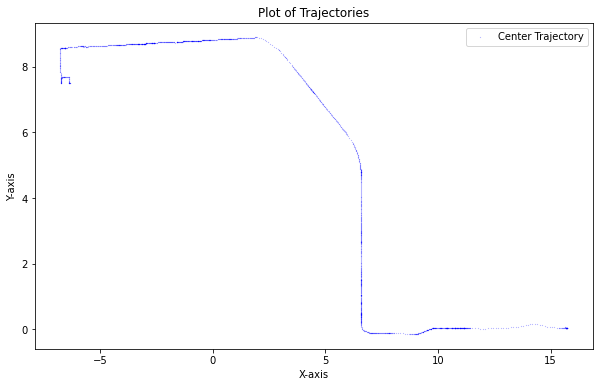

In [125]:
points = approach_1

x = [point[0] for point in points]
y = [point[1] for point in points]

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the trajectories using the plot() function
ax.scatter(x, y, c='blue', label='Center Trajectory', s = 0.01)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style

# Set labels and title for the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

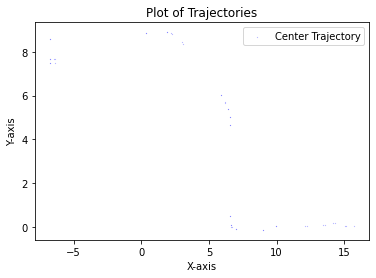

In [126]:
points = approach_11

x = [point[0] for point in points]
y = [point[1] for point in points]

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Plot the trajectories using the plot() function
ax.scatter(x, y, c='blue', label='Center Trajectory', s = 0.01)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style

# Set labels and title for the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

Example: episilon = 0.03 and blue line is generated by approach 1

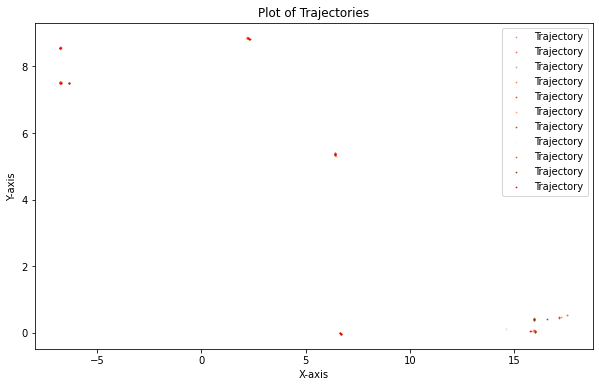

In [12]:
#list of my stupid little colors
colors = ['salmon',
'tomato',
'darksalmon',
'coral',
'orangered',
'lightsalmon',
'sienna',
'seashell',
'chocolate',
'saddlebrown', 'red' ]

fig, ax = plt.subplots(figsize=(10,6))
counter = 0
for points in e_03_set:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.scatter(x, y, c=colors[counter], label='Trajectory', s = 0.5)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style
    counter = counter +1

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

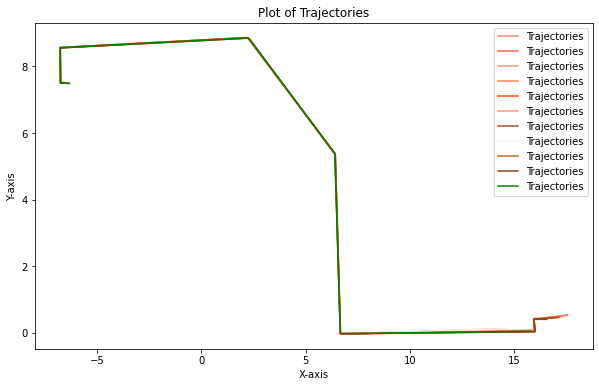

In [11]:
#list of my stupid little colors
colors = ['salmon',
'tomato',
'darksalmon',
'coral',
'orangered',
'lightsalmon',
'sienna',
'seashell',
'chocolate',
'saddlebrown', 'green' ]

fig, ax = plt.subplots(figsize=(10,6))
counter = 0
for points in e_03_set:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.plot(x, y, c=colors[counter], label='Trajectories', markersize=0.005)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style
    counter = counter +1

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [ ]:
colors = ['salmon',
'tomato',
'darksalmon',
'coral',
'orangered',
'lightsalmon',
'sienna',
'seashell',
'chocolate',
'saddlebrown', 'red' ]

fig, ax = plt.subplots()
counter = 0
for points in e_003_set:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.plot(x, y, c=colors[counter], label='Trajectories', markersize=0.005)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style
    counter = counter +1

points = approach_1

x = [point[0] for point in points]
y = [point[1] for point in points]

# Create a figure and axes for the plot

# Plot the trajectories using the plot() function
ax.plot(x, y, c='blue', label='Trajectories', markersize=0.005) 
    

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

epsilon-simplification function:

In [8]:
#Import functions to calculate ε-simplications from Task 2

def TS_greedy(T: List[Tuple[float, float]], eps: float) -> List[Tuple[float, float]]:
    if len(T) < 3:
        return T
    else:
        T_star = [T[0], T[-1]]
        dmax = 0
        index = 0
        for i in range(1, len(T) - 1):
            dis = d(T[i], T_star)
            if dis > dmax:
                index = i 
                dmax = dis
        if dmax <= eps: 
            return T_star 
        else:
            return TS_greedy(T[0:index], eps) + TS_greedy(T[index:], eps) 
        
def d(q: Tuple[float, float], e: List[Tuple[float, float]]) -> float:
    # Let the start point of e be a, and end point be b 
    a, b = e
    dot_product = (q[0] - a[0]) * (b[0] - a[0]) + (q[1] - a[1]) * (b[1] - a[1])
    ab_length_sq = (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2
    projection = dot_product / ab_length_sq
    if projection <= 0:
        return ((q[0] - a[0]) ** 2 + (q[1] - a[1]) ** 2) ** 0.5
    elif projection >= 1:
        return ((q[0] - b[0]) ** 2 + (q[1] - b[1]) ** 2) ** 0.5
    else:
        closest_x = a[0] + projection * (b[0] - a[0])
        closest_y = a[1] + projection * (b[1] - a[1])
        return ((q[0] - closest_x) ** 2 + (q[1] - closest_y) ** 2) ** 0.5

dtw function:

In [7]:
def dist(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

def dtw(seriesA, seriesB):
    m, n = len(seriesA) + 1, len(seriesB) + 1
    dp = [[[float('inf'), set()] for _ in range(n)] for _ in range(m)]
    dp[0][0] = [0, None]

    for i in range(m - 1):
        for j in range(n - 1):
            curr = dp[i][j]
            curr[0] += dist(seriesA[i], seriesB[j]) ** 2
            if curr[0] < dp[i + 1][j][0]: dp[i + 1][j] = [curr[0], (i, j)]
            if curr[0] < dp[i][j + 1][0]: dp[i][j + 1] = [curr[0], (i, j)]
            if curr[0] < dp[i + 1][j + 1][0]: dp[i + 1][j + 1] = [curr[0], (i, j)]
    
    total_cost, last = dp[len(seriesA) - 1][len(seriesB) - 1]
    
    path = {(len(seriesA) - 1, len(seriesB) - 1)}
    while last is not None:
        path.add(last)
        last = dp[last[0]][last[1]][1]

    return total_cost / len(path), path

In [ ]:
def dtw2(seriesA, seriesB):
    